In [1]:
# import some basic library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings as w
w.filterwarnings("ignore")

In [2]:
car=pd.read_csv("car_data1.csv")
car.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car.shape

(301, 9)

1. checking how many unique values are there in categorical features.

In [4]:
x=car[["Fuel_Type","Seller_Type","Transmission","Owner"]]

In [5]:
for un in x:
    print(x[un].unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [6]:
# check null values in dataset
car.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
car.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
new_dataset=car[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [9]:
new_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [10]:
# creating nrew features
new_dataset["current_year"]=2022

In [11]:
# numbers of year of car
new_dataset["no_year"]=new_dataset["current_year"]-new_dataset["Year"]

In [12]:
new_dataset

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current_year,no_year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8
...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2022,6
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2022,7
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2022,13
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2022,5


In [13]:
# delecting unwanted columns
new_dataset.drop(["Year","current_year"],axis=1,inplace=True)

In [14]:
new_dataset.head(2)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9


In [15]:
# converting categorical data into numerical data
df_obj=new_dataset.select_dtypes("object")

In [16]:
df_num=new_dataset.select_dtypes(["int64","float64"])


In [17]:
from sklearn.preprocessing import LabelEncoder
for col in df_obj:
    le=LabelEncoder()
    df_obj[col]=le.fit_transform(df_obj[[col]])

In [18]:
# concatenating numerical and categorical columns in new dataFrame
final_dataframe=pd.concat([df_num,df_obj],axis=1)

In [19]:
final_dataframe

,Selling_Price,Present_Price,Kms_Driven,Owner,no_year,Fuel_Type,Seller_Type,Transmission
0,3.35,5.59,27000,0,8,2,0,1
1,4.75,9.54,43000,0,9,1,0,1
2,7.25,9.85,6900,0,5,2,0,1
3,2.85,4.15,5200,0,11,2,0,1
4,4.60,6.87,42450,0,8,1,0,1
...,...,...,...,...,...,...,...,...
296,9.50,11.60,33988,0,6,1,0,1
297,4.00,5.90,60000,0,7,2,0,1
298,3.35,11.00,87934,0,13,2,0,1
299,11.50,12.50,9000,0,5,1,0,1


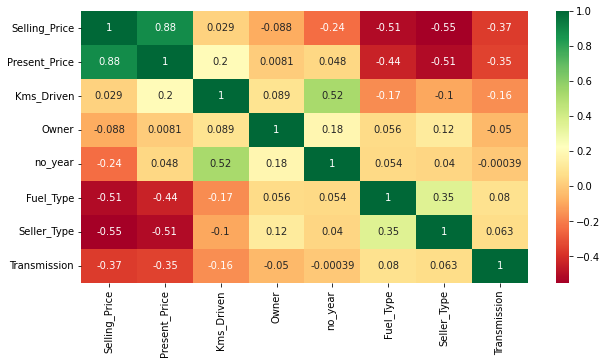

In [20]:
plt.figure(figsize=(10,5))
corrmat=final_dataframe.corr()
top_corr_features=corrmat.index
sns.heatmap(final_dataframe[top_corr_features].corr(),annot=True,cmap="RdYlGn")
corrmat=final_dataframe.corr()
top_corr_features=corrmat.index

In [21]:
# selecting input columns and output columns
X=final_dataframe.drop("Selling_Price",axis=1)
Y=final_dataframe["Selling_Price"]

In [22]:
# performing train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=1,random_state=1)

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [24]:
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)


[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [25]:
from sklearn.model_selection import RandomizedSearchCV

In [26]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [27]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [28]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rfr, param_distributions = random_grid, n_iter = 10, cv = 5, verbose=2, random_state=1,n_jobs=1)

In [29]:
rf_random.fit(X_train,Y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.4s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.3s
[CV] END max_depth=15, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=600; total time=   0.3s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=800; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_est

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=1, verbose=2)

In [30]:
rf_random.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 15}

In [31]:
rf_random.best_score_

0.9065682788693629

In [32]:
predictions=rf_random.predict(X_test)

In [33]:
from sklearn import metrics

In [34]:
print('MAE:', metrics.mean_absolute_error(Y_test, predictions))
print('MSE:', metrics.mean_squared_error(Y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

MAE: 0.7900000000000036
MSE: 0.6241000000000057
RMSE: 0.7900000000000036
